# An Analysis of Kallisto's Boostraps
Author: John Vivian — Computational Genomics Lab, Genomics Institute, UCSC <br>
Date: 5-3-16

Kallisto is a wicked new transcript-level expression estimation software from UC Berkeley: https://pachterlab.github.io/kallisto/

The output TSV produced by Kallisto contains a table where each transcript is a row and has columns for name, size, est_count, length, eff_length, and tpm. What would be a welcome addition, is an additional column that provides an accurate "variance" derived from the bootstrap table. 


In [15]:
%matplotlib inline
from __future__ import print_function
import pandas as pd
import numpy as np
import h5py
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [16]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Read in the HDF5 Kallisto data

In [17]:
h5 = [x for x in os.listdir('.') if 'h5' in x][0]
tsv = [x for x in os.listdir('.') if 'tsv' in x][0]

In [18]:
store = h5py.File(h5)

Examine the keys in the HDF5 file

In [19]:
print store.keys()

SyntaxError: invalid syntax (<ipython-input-19-9793f0b1fb09>, line 1)

In [20]:
bootstrap_h5 = store['bootstrap']

Check number of transcripts in a bootstrap

In [21]:
len(bootstrap_h5[bootstrap_h5.keys()[0]])

197044

Get transcript names

In [22]:
df_tsv = pd.read_table(tsv, sep='\t')

In [23]:
df_tsv.head()

,target_id,length,eff_length,est_counts,tpm
0,ENST00000619216.1,68,20.4508,35.96850,39.370200
1,ENST00000473358.1,712,539.7450,7.06026,0.292811
2,ENST00000469289.1,535,362.7560,0.00000,0.000000
3,ENST00000607096.1,138,29.9028,0.00000,0.000000
4,ENST00000417324.1,1187,1014.7300,0.00000,0.000000


In [24]:
print('\t'.join(df_tsv.columns))

target_id	length	eff_length	est_counts	tpm


In [25]:
df_tsv.target_id.head()

0    ENST00000619216.1
1    ENST00000473358.1
2    ENST00000469289.1
3    ENST00000607096.1
4    ENST00000417324.1
Name: target_id, dtype: object

## Build Bootstrap DataFrame

In [26]:
df = pd.DataFrame()

Add the transcript IDs and the est_counts from the TSV to the DataFrame

In [27]:
df['est_counts'] = df_tsv.est_counts
df.index = df_tsv.target_id

In [28]:
for key in bootstrap_h5.keys():
    df[key] = bootstrap_h5[key]

In [29]:
df.head()

,est_counts,bs0,bs1,bs10,bs11,bs12,bs13,bs14,bs15,bs16,...,bs90,bs91,bs92,bs93,bs94,bs95,bs96,bs97,bs98,bs99
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000619216.1,35.96850,34.858954,36.635397,36.182804,37.702723,35.605696,36.229959,35.266917,33.813830,37.520026,...,32.334827,38.627166,32.765957,34.130868,34.463825,32.441327,37.409425,32.918000,31.317695,35.178026
ENST00000473358.1,7.06026,7.879594,11.632951,0.000000,9.410587,8.486367,5.019253,4.420041,8.059427,8.367784,...,0.000000,9.923369,7.493996,5.321462,2.372988,6.608679,6.765663,11.176495,2.974227,6.527188
ENST00000469289.1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENST00000607096.1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENST00000417324.1,0.00000,0.000000,0.000000,0.024946,0.000000,0.000000,0.021667,0.067594,0.000000,0.000000,...,0.015224,0.005651,0.000000,0.000000,0.000000,0.000000,0.000000,0.029519,0.018755,0.000000


Find the standard deviation for each transcript across all of the bootstraps

In [30]:
df['std'] = df[bootstrap_h5.keys()].std(axis=1)

In [31]:
df.head(10)

,est_counts,bs0,bs1,bs10,bs11,bs12,bs13,bs14,bs15,bs16,...,bs91,bs92,bs93,bs94,bs95,bs96,bs97,bs98,bs99,std
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000619216.1,35.968500,34.858954,36.635397,36.182804,37.702723,35.605696,36.229959,35.266917,33.813830,37.520026,...,38.627166,32.765957,34.130868,34.463825,32.441327,37.409425,32.918000,31.317695,35.178026,2.036653
ENST00000473358.1,7.060260,7.879594,11.632951,0.000000,9.410587,8.486367,5.019253,4.420041,8.059427,8.367784,...,9.923369,7.493996,5.321462,2.372988,6.608679,6.765663,11.176495,2.974227,6.527188,4.076943
ENST00000469289.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENST00000607096.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENST00000417324.1,0.000000,0.000000,0.000000,0.024946,0.000000,0.000000,0.021667,0.067594,0.000000,0.000000,...,0.005651,0.000000,0.000000,0.000000,0.000000,0.000000,0.029519,0.018755,0.000000,0.015044
ENST00000461467.1,14.130600,12.913919,15.370113,11.904537,17.308826,1.996043,6.195364,14.543568,24.332494,3.456346,...,16.176771,25.521783,19.666414,14.117804,24.595883,11.809947,17.748622,14.064912,16.964661,6.480863
ENST00000335137.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENST00000466430.5,243.096000,226.132960,224.601517,239.499399,223.581139,260.302012,229.222183,242.659089,241.815230,194.392281,...,246.653896,225.009842,235.735030,245.056189,242.933313,216.810920,236.733849,214.167299,229.524496,14.499732
ENST00000495576.1,0.059745,0.000000,10.142511,0.000000,0.000000,0.000038,1.399365,5.353480,0.000000,32.048358,...,12.594994,0.002593,0.000000,27.621124,14.912620,0.000000,0.000000,2.764881,40.975099,9.490752


Let's examine a subset of transcripts with really high standard deviation

In [32]:
df[df['std'] > 1000].head(10)

,est_counts,bs0,bs1,bs10,bs11,bs12,bs13,bs14,bs15,bs16,...,bs91,bs92,bs93,bs94,bs95,bs96,bs97,bs98,bs99,std
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000394936.7,53103.10,5.431762e+04,5.449100e+04,5.345078e+04,5.306860e+04,5.358967e+04,5.241635e+04,5.180252e+04,5.304778e+04,5.288265e+04,...,5.171168e+04,5.479379e+04,5.309850e+04,5.540951e+04,5.140849e+04,5.268185e+04,5.306524e+04,5.048639e+04,5.098360e+04,1469.710795
ENST00000394934.4,12492.20,1.135424e+04,1.146331e+04,1.245762e+04,1.239158e+04,1.184080e+04,1.266062e+04,1.436882e+04,1.304275e+04,1.284033e+04,...,1.418548e+04,1.104224e+04,1.237355e+04,1.014449e+04,1.422797e+04,1.288520e+04,1.287011e+04,1.480318e+04,1.541866e+04,1570.888773
ENST00000551295.6,16025.50,1.845370e+04,1.527778e+04,1.733916e+04,1.575618e+04,1.379531e+04,1.499667e+04,1.727363e+04,1.593197e+04,1.437894e+04,...,1.676415e+04,1.593129e+04,1.750158e+04,1.651256e+04,1.496867e+04,1.575809e+04,1.505673e+04,1.659010e+04,1.731081e+04,1322.235271
ENST00000347616.5,7014.90,4.614467e+03,7.909358e+03,5.710775e+03,7.237097e+03,9.328102e+03,7.906938e+03,5.618917e+03,7.142708e+03,8.432206e+03,...,6.184586e+03,7.307904e+03,5.665882e+03,6.456928e+03,7.858152e+03,7.253801e+03,8.009238e+03,6.479335e+03,5.737030e+03,1330.573682
ENST00000616213.4,9228.28,1.013257e+04,8.588807e+03,1.105962e+04,8.418738e+03,6.265018e+03,9.436142e+03,1.084407e+04,9.781201e+03,9.380707e+03,...,7.761098e+03,1.007200e+04,8.576923e+03,8.042896e+03,9.394944e+03,8.118562e+03,8.547091e+03,1.068081e+04,1.119986e+04,1258.403936
ENST00000620145.4,22847.60,2.332454e+04,2.282165e+04,2.051182e+04,2.311270e+04,2.462709e+04,2.183743e+04,2.302901e+04,2.128937e+04,2.381597e+04,...,2.099864e+04,2.218546e+04,2.349443e+04,2.382544e+04,2.214010e+04,2.337195e+04,2.447733e+04,2.149420e+04,2.201560e+04,1088.226827
ENST00000620879.4,25456.20,2.562646e+04,2.628262e+04,2.404780e+04,2.605260e+04,2.589020e+04,2.668407e+04,2.824186e+04,2.606891e+04,2.511689e+04,...,2.542116e+04,2.639584e+04,2.796146e+04,2.373137e+04,2.577557e+04,2.585177e+04,2.511259e+04,2.348661e+04,2.667475e+04,1230.099836
ENST00000398774.6,10020.40,8.118373e+03,7.310102e+03,1.325326e+04,1.116124e+04,9.408025e+03,1.014951e+04,1.188741e+04,1.232951e+04,1.012774e+04,...,9.397827e+03,7.380413e+03,8.732930e+03,9.198922e+03,8.362526e+03,1.140980e+04,9.752938e+03,7.854154e+03,8.474348e+03,1534.005722
ENST00000436759.6,8148.40,8.405562e+03,9.598272e+03,7.420092e+03,7.600784e+03,7.267723e+03,7.493360e+03,7.480854e+03,6.857828e+03,8.488671e+03,...,6.438701e+03,1.144544e+04,8.321185e+03,9.979484e+03,9.173472e+03,7.653407e+03,8.598112e+03,1.002498e+04,8.807623e+03,1051.990115


Let's take the mean of each transcript and compare it to the est_count value Kallisto prints in the TSV

In [33]:
df['mean'] = df[bootstrap_h5.keys()].median(axis=1)

Let's look at non-zero est_count values (as they're more interesting)

In [34]:
df[['est_counts', 'mean', 'std']][df['est_counts'] > 0].head()

,est_counts,mean,std
target_id,,,
ENST00000619216.1,35.968500,35.149333,2.036653
ENST00000473358.1,7.060260,6.436834,4.076943
ENST00000461467.1,14.130600,15.480425,6.480863
ENST00000466430.5,243.096000,237.810827,14.499732
ENST00000495576.1,0.059745,0.625324,9.490752


In [35]:
log_df = df[df.est_counts > 0]

In [36]:
log_df = np.log(log_df)

In [37]:
log_df['std'] = log_df[bootstrap_h5.keys()].std(axis=1)

In [38]:
log_df = log_df.dropna()

In [39]:
log_df.head()

,est_counts,bs0,bs1,bs10,bs11,bs12,bs13,bs14,bs15,bs16,...,bs92,bs93,bs94,bs95,bs96,bs97,bs98,bs99,std,mean
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000619216.1,3.582644,3.551310,3.601015,3.588584,3.629732,3.572506,3.589886,3.562945,3.520870,3.624875,...,3.489390,3.530202,3.539910,3.479433,3.621923,3.494020,3.444183,3.560422,0.058147,3.559606
ENST00000466430.5,5.493456,5.421123,5.414328,5.478551,5.409774,5.561843,5.434692,5.491658,5.488174,5.269878,...,5.416144,5.462708,5.501488,5.492787,5.379026,5.466937,5.366757,5.436010,0.062181,5.471476
ENST00000484859.1,5.965554,6.019961,6.052045,5.871643,5.978304,5.962363,5.947005,5.909997,5.963985,5.949207,...,5.829564,5.917966,5.962368,6.038773,5.959479,6.045524,5.974186,6.010825,0.070915,5.964988
ENST00000466557.6,5.882431,5.864858,5.904795,5.794229,5.849939,5.893140,5.928807,5.871430,5.899152,5.880413,...,5.894943,5.952791,6.014265,5.778991,5.843498,5.838698,5.853138,5.886040,0.064109,5.869491
ENST00000491962.1,3.951174,3.916785,3.889728,4.004674,4.083609,3.946610,3.912797,3.856305,3.930425,3.879550,...,3.973575,3.754273,3.942956,3.879689,4.085273,3.960940,3.737629,3.897946,0.117607,3.945022


Compare the mean we get from the bootstraps and the est_counts value to ensure they're not that different

/Users/Jvivian/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


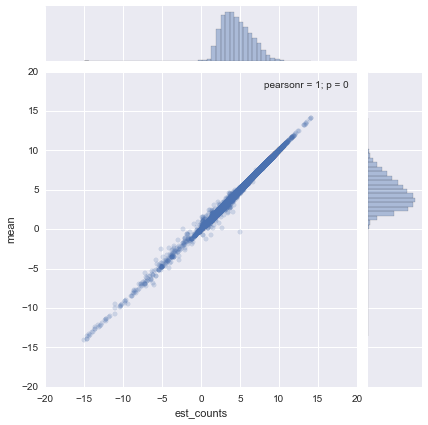

In [40]:
sns.jointplot('est_counts', 'mean', log_df, alpha=0.2)

Let's look at the relationship between standard deviation of the boot straps and the est_counts value.  We'd assume that there'd be a mostly linear relationship between how large the standard deviations are and the size of the count value.

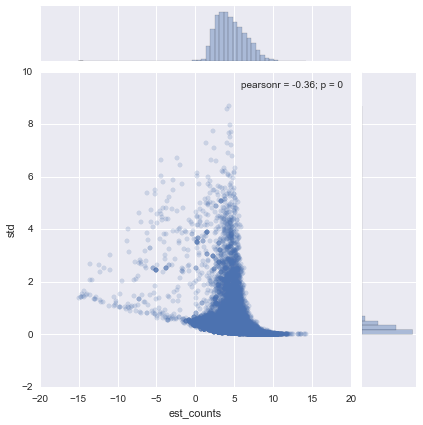

In [41]:
sns.jointplot('est_counts', 'std', log_df, alpha=0.2)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(log_df[bootstrap_h5.keys()].T)

PCA(copy=True, n_components=2, whiten=False)

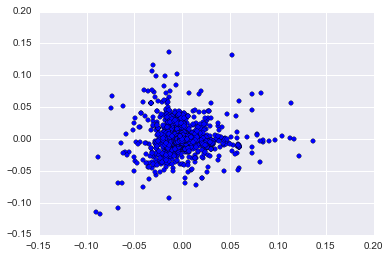

In [43]:
plt.scatter(pca.components_[0], pca.components_[1])

## Analysis of Randomly Selected Transcripts across 10 Kallisto Samples
Use Kallisto data from the CGL RNA-seq recompute and analyze the results. 

In [44]:
h5_samples = [os.path.join('samples', x) for x in os.listdir('samples') if 'h5' in x]
tsv_samples = [os.path.join('samples', x) for x in os.listdir('samples') if 'tsv' in x]

Create dictionary for dataframes and process

In [45]:
h5 = {}

In [46]:
for h5_sample, tsv_sample in zip(h5_samples, tsv_samples):
    print('Creating Dataframe from file: {}'.format(h5_sample))
    store = h5py.File(h5_sample)
    bootstrap_h5 = store['bootstrap']
    df_tsv = pd.read_table(tsv_sample, sep='\t')
    df = pd.DataFrame()
    df['est_counts'] = np.log(df_tsv.est_counts)
    for key in bootstrap_h5.keys():
        df[key] = np.log(bootstrap_h5[key])
    df.index = df_tsv.target_id
    df['mean'] = df[bootstrap_h5.keys()].median(axis=1)    
    df['std'] = df[bootstrap_h5.keys()].std(axis=1)
    df = df.replace(-np.inf, np.nan).dropna()
    h5[os.path.basename(h5_sample).split('.')[0]] = df

Creating Dataframe from file: samples/gtex_1.h5
Creating Dataframe from file: samples/gtex_2.h5
Creating Dataframe from file: samples/gtex_3.h5
Creating Dataframe from file: samples/gtex_4.h5
Creating Dataframe from file: samples/target_1.h5
Creating Dataframe from file: samples/target_2.h5
Creating Dataframe from file: samples/tcga_1.h5
Creating Dataframe from file: samples/tcga_2.h5
Creating Dataframe from file: samples/tcga_3.h5
Creating Dataframe from file: samples/tcga_4.h5


In [47]:
gtex_h5 = {x: y for x, y in h5.iteritems() if 'gtex' in x}
target_h5 = {x: y for x, y in h5.iteritems() if 'target' in x}
tcga_h5 = {x: y for x, y in h5.iteritems() if 'tcga' in x}
h5_group = [tcga_h5, target_h5, gtex_h5]

## Plotting

Create union set of non-zero transcripts from all 10 samples

In [48]:
transcripts = []
for key in h5:
    transcripts.append(h5[key].index)

In [49]:
seed = set(transcripts[0])
for t in transcripts:
    seed = seed.intersection(set(t))

Select 10 transcripts at random

In [50]:
num_transcripts = 5

In [71]:
random_set = random.sample(seed, num_transcripts)

/Users/Jvivian/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/Jvivian/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


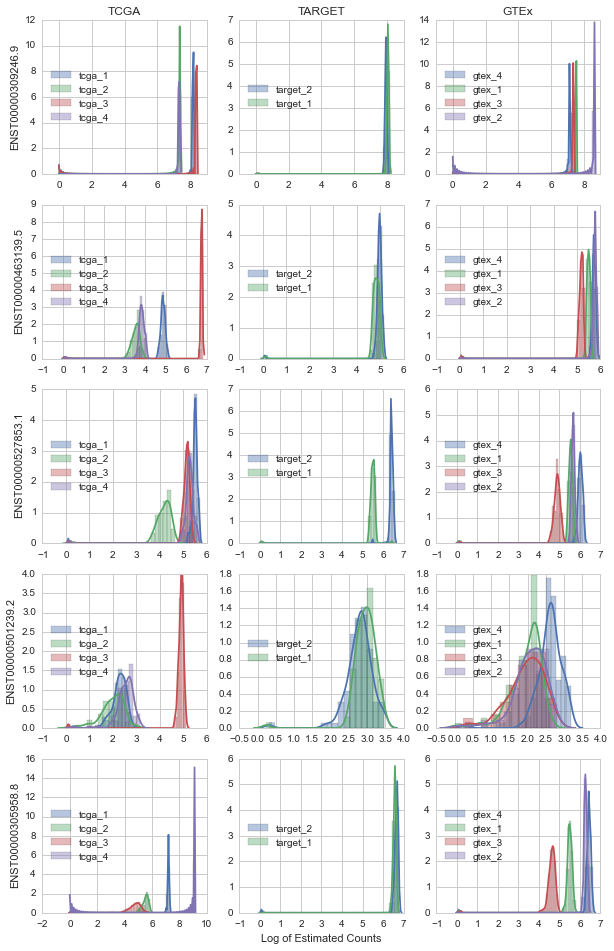

In [52]:
sns.set_style('whitegrid')
f, axarr = plt.subplots(num_transcripts, 3, figsize=(10, 16))
for i, transcript in enumerate(random_set):
    for j in xrange(len(h5_group)):
        for k, sample in enumerate(h5_group[j].keys()):
            sns.distplot(h5_group[j][sample].loc[transcript], ax=axarr[i, j], axlabel=False, label=sample)
        axarr[i, j].legend(loc='center left', ncol=1)
    axarr[i, 0].set_ylabel(transcript)
axarr[0, 0].set_title('TCGA')
axarr[0, 1].set_title('TARGET')
axarr[0, 2].set_title('GTEx')
axarr[-1, 1].set_xlabel('Log of Estimated Counts')
#plt.savefig('Distributions_Gamma.pdf')

## Gamma Distribution Fit

In [53]:
from scipy.stats import gamma, norm

Let's grab a random transcript's bootstrap values to compute the parameters for a gamma distribution

In [72]:
transcript = random_set[2]

In [73]:
a, loc, scale = gamma.fit(tcga_h5['tcga_1'].loc[transcript])
#rv = gamma(a, loc, scale)
print(a, loc, scale)

0.0411776293669 6.92070096724 3.47510687585


In [74]:
norm.fit(tcga_h5['tcga_1'].loc[transcript])

(6.9302702592007304, 0.68397501806423877)

In [75]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

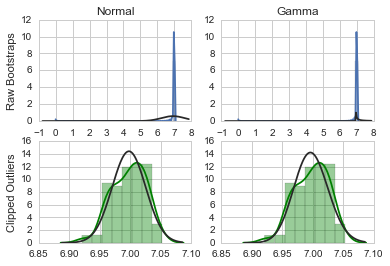

In [76]:
f, axarr = plt.subplots(2, 2)
sns.distplot(tcga_h5['tcga_1'].loc[transcript], fit=norm, ax=axarr[0, 0])
sns.distplot(tcga_h5['tcga_1'].loc[transcript], fit=gamma, ax=axarr[0, 1])
sns.distplot(reject_outliers(tcga_h5['tcga_1'].loc[transcript]), fit=norm, ax=axarr[1, 0], axlabel=False, color='g')
sns.distplot(reject_outliers(tcga_h5['tcga_1'].loc[transcript]), fit=gamma, ax=axarr[1, 1], axlabel=False, color='g')
#x = np.linspace(-1,5,1000)
#plt.plot(x,rv.pdf(x))
#plt.plot()
axarr[0,0].set_title('Normal')
axarr[0, 1].set_title('Gamma')
axarr[0, 0].set_ylabel('Raw Bootstraps')
axarr[1,0].set_ylabel('Clipped Outliers')
plt.savefig('gamma_vs_norm.png', dpi=300)

In [77]:
print(min(tcga_h5['tcga_1'].loc[transcript]))
print(max(tcga_h5['tcga_1'].loc[transcript]))
print(np.mean(tcga_h5['tcga_1'].loc[transcript]))
print(np.median(tcga_h5['tcga_1'].loc[transcript]))
print(tcga_h5['tcga_1'].loc[transcript].est_counts)

0.0280471848066
7.05266795373
6.9302702592
7.0015293066
6.99506994331
